In [31]:
import pandas as pd
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('english.csv')
df.head(1)

,image,label
0,Img/img001-001.png,0


In [4]:
l=[]
def fun(file,lab):
    img = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img,(200,200))
    img = img/255
    img = img.flatten()
    l.append([img,lab])

In [5]:
for i in range(len(df)):
    fun(df['image'][i],df['label'][i])

In [6]:
dff = pd.DataFrame(l,columns=['im','la'])

In [11]:
x = np.array(dff['im'].tolist())
y = np.array(dff['la'].tolist())

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [16]:
x_train.shape

(2728, 40000)

In [17]:
y_train.shape

(2728,)

In [18]:
x_test.shape

(682, 40000)

In [19]:
y_test.shape

(682,)

In [26]:
clr = RandomForestClassifier(n_estimators=500,random_state=40)

In [27]:
clr.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=40)

In [28]:
y_pred = clr.predict(x_test)

In [29]:
print(accuracy_score(y_test,y_pred))

0.4574780058651026


['L']


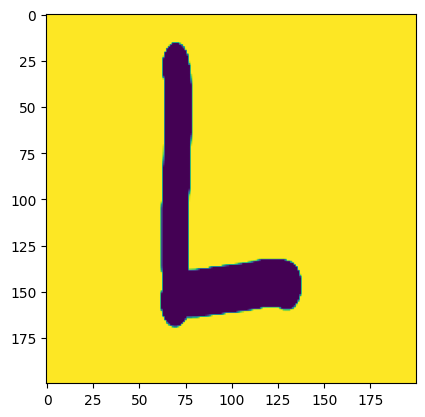

['2']


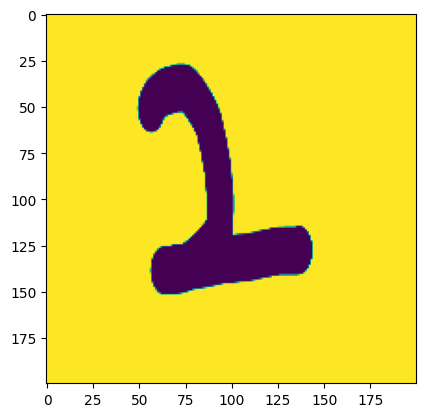

['O']


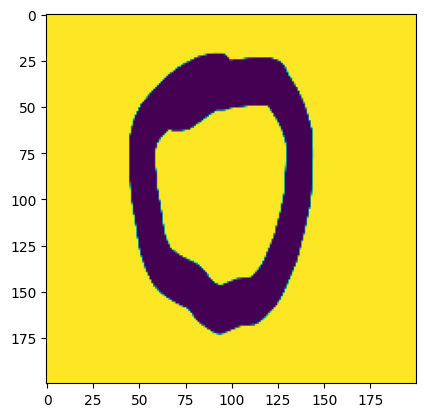

['g']


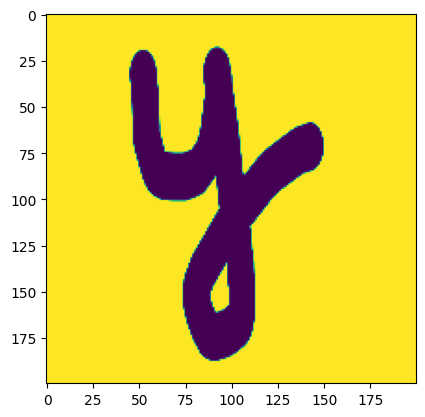

['A']


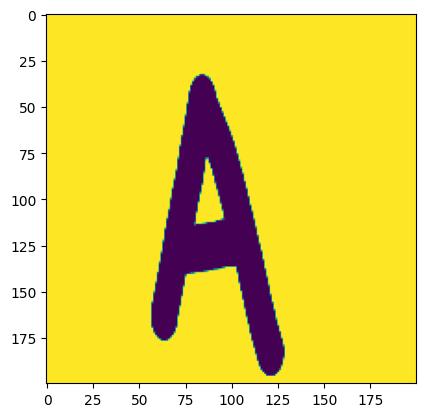

['M']


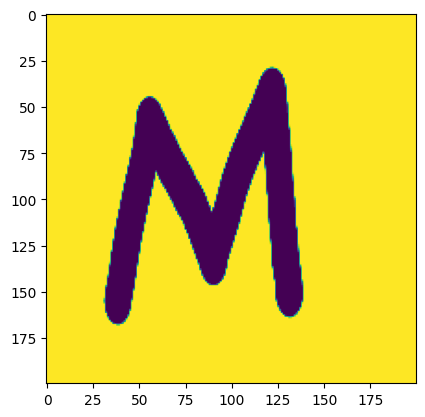

['S']


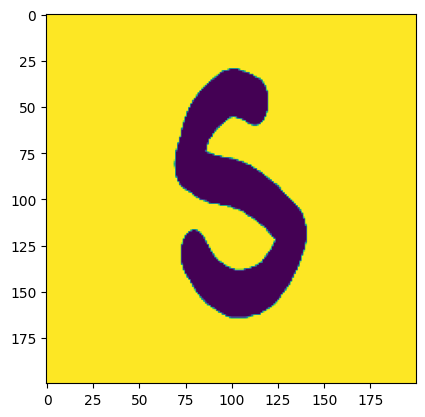

['N']


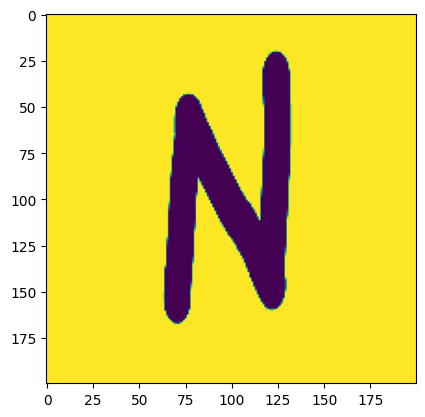

['9']


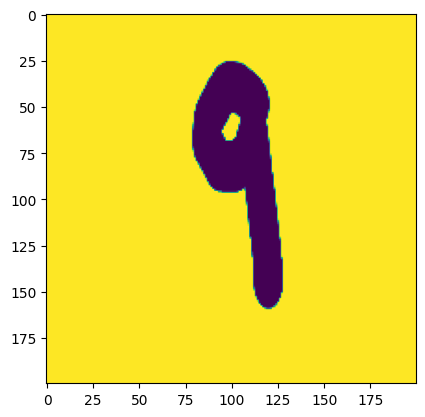

['T']


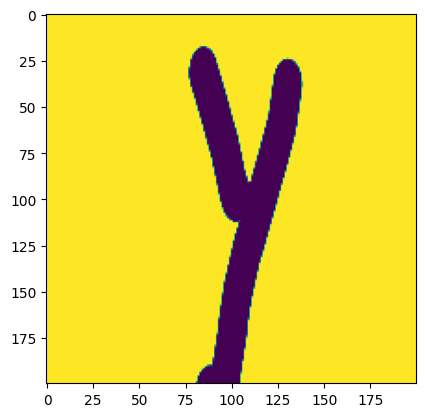

In [101]:
for i in range(1,11):
    l='test_me/image'+str(i)+'.png'
    l1 = cv2.imread(l,cv2.IMREAD_GRAYSCALE)
    l1 = cv2.resize(l1,(200,200))
    plt.imshow(l1)
    l1=l1/255
    l1 = l1.flatten()
    y_pred=clr.predict([l1])
    y_pred = labelencoder.inverse_transform(y_pred)
    print(y_pred)
    plt.show()